In [17]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
import seaborn as sns
from sklearn.cluster import KMeans


In [4]:
data = pd.read_csv('cmm_erdos_2022/pharmacy_tx.csv')

Here we want to visualize clusters based on rejection rate and median price of a drug based on group or pcn. I've considered pcn, one might also experiment with group. We predict these clusters corresponds to different tiers to formlary:

1) Tier 1 : generic drugs/preferred branded drugs.

2) Tier 2 : non preferred generic drugs/preferred branded drugs.

3) Tier 3: non preferred branded drugs.

4) Tier 4 : very high speciality drugs.

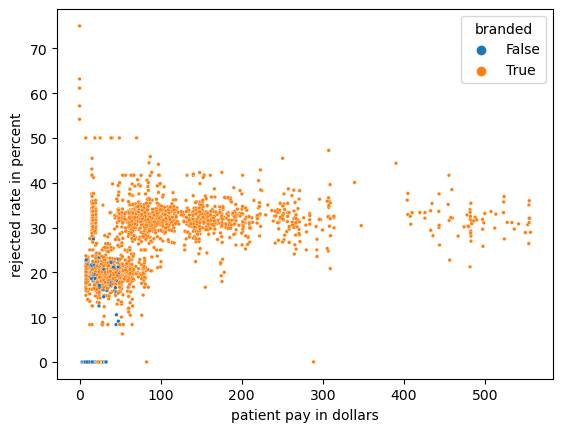

In [33]:
style.use('default')
temp1=data.groupby(['pcn','drug'],as_index=False).rejected.mean()
temp2=data.groupby(['pcn','drug'],as_index=False).patient_pay.median()
tt=pd.merge(temp1,temp2,on=['pcn','drug'])
tt.rejected=tt.rejected*100
tt['branded']=tt.drug.apply(lambda x:x.startswith('branded')==True)

ax= sns.scatterplot(data=tt, x='patient_pay',y='rejected',hue='branded',s=7)
ax.set(xlabel='patient pay in dollars',ylabel='rejected rate in percent')
plt.show()



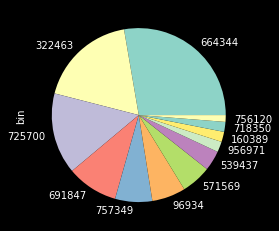

In [24]:
style.use('dark_background')

data.bin.value_counts(normalize=True).plot.pie()
plt.show()

Checking each bin; to observe any clusters. Except the large insurance companies `664344`,`322463` and `691847`. There are four clusters we can visualize. These clusters might correpond to the four tiers of drugs.

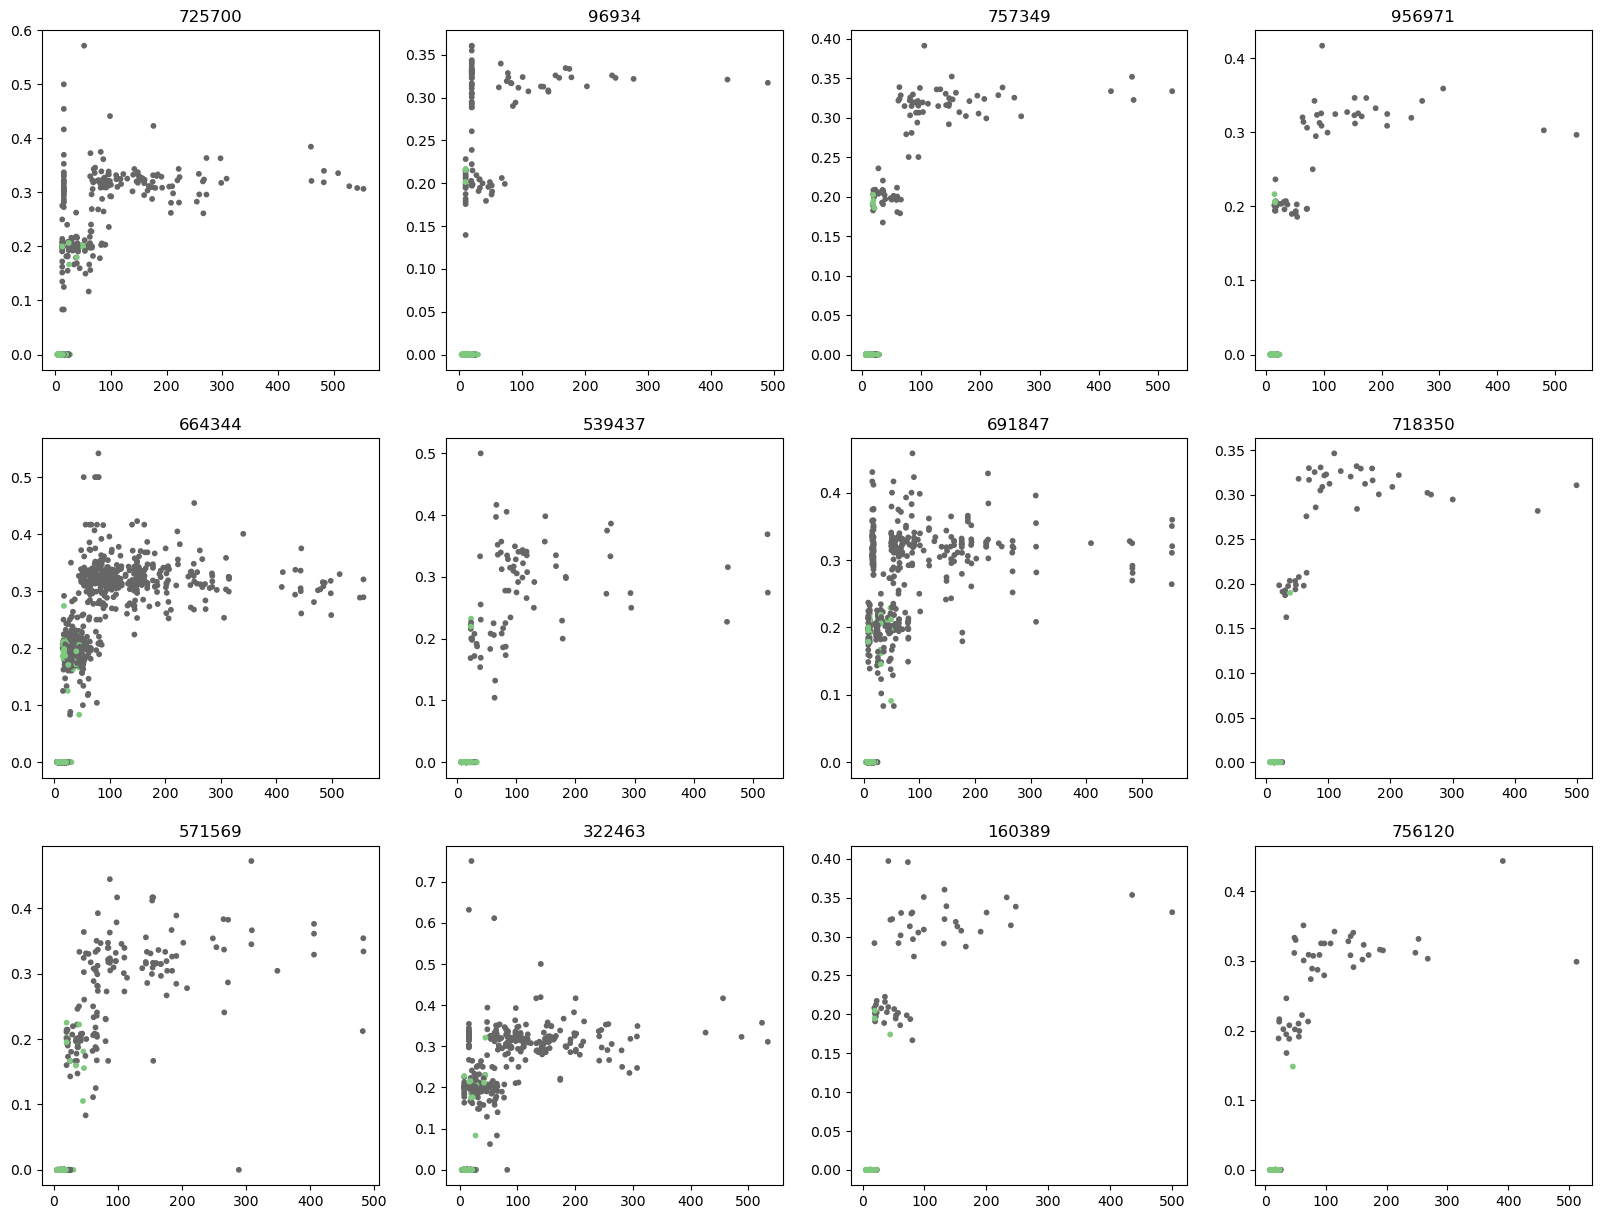

In [31]:
style.use('default')
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
i=0;j=0
for bin in data.bin.unique():
    temp1=data[data.bin==bin].groupby(['pcn','drug'],as_index=False).rejected.mean()
    temp2=data[data.bin==bin].groupby(['pcn','drug'],as_index=False).patient_pay.quantile(0.75)
    tt=pd.merge(temp1,temp2,on=['pcn','drug'])
    tt['branded']=tt.drug.apply(lambda x:x.startswith('branded')==True)
    
    axes[i,j].scatter(tt.patient_pay,tt.rejected,c=tt['branded'],s=10,cmap='Accent')
    axes[i,j].set_title(bin)
    i+=1
    if i==3:
        j+=1
        i=0

Looking closely into the biggest insurance company `664344` and checking their individual pcns.

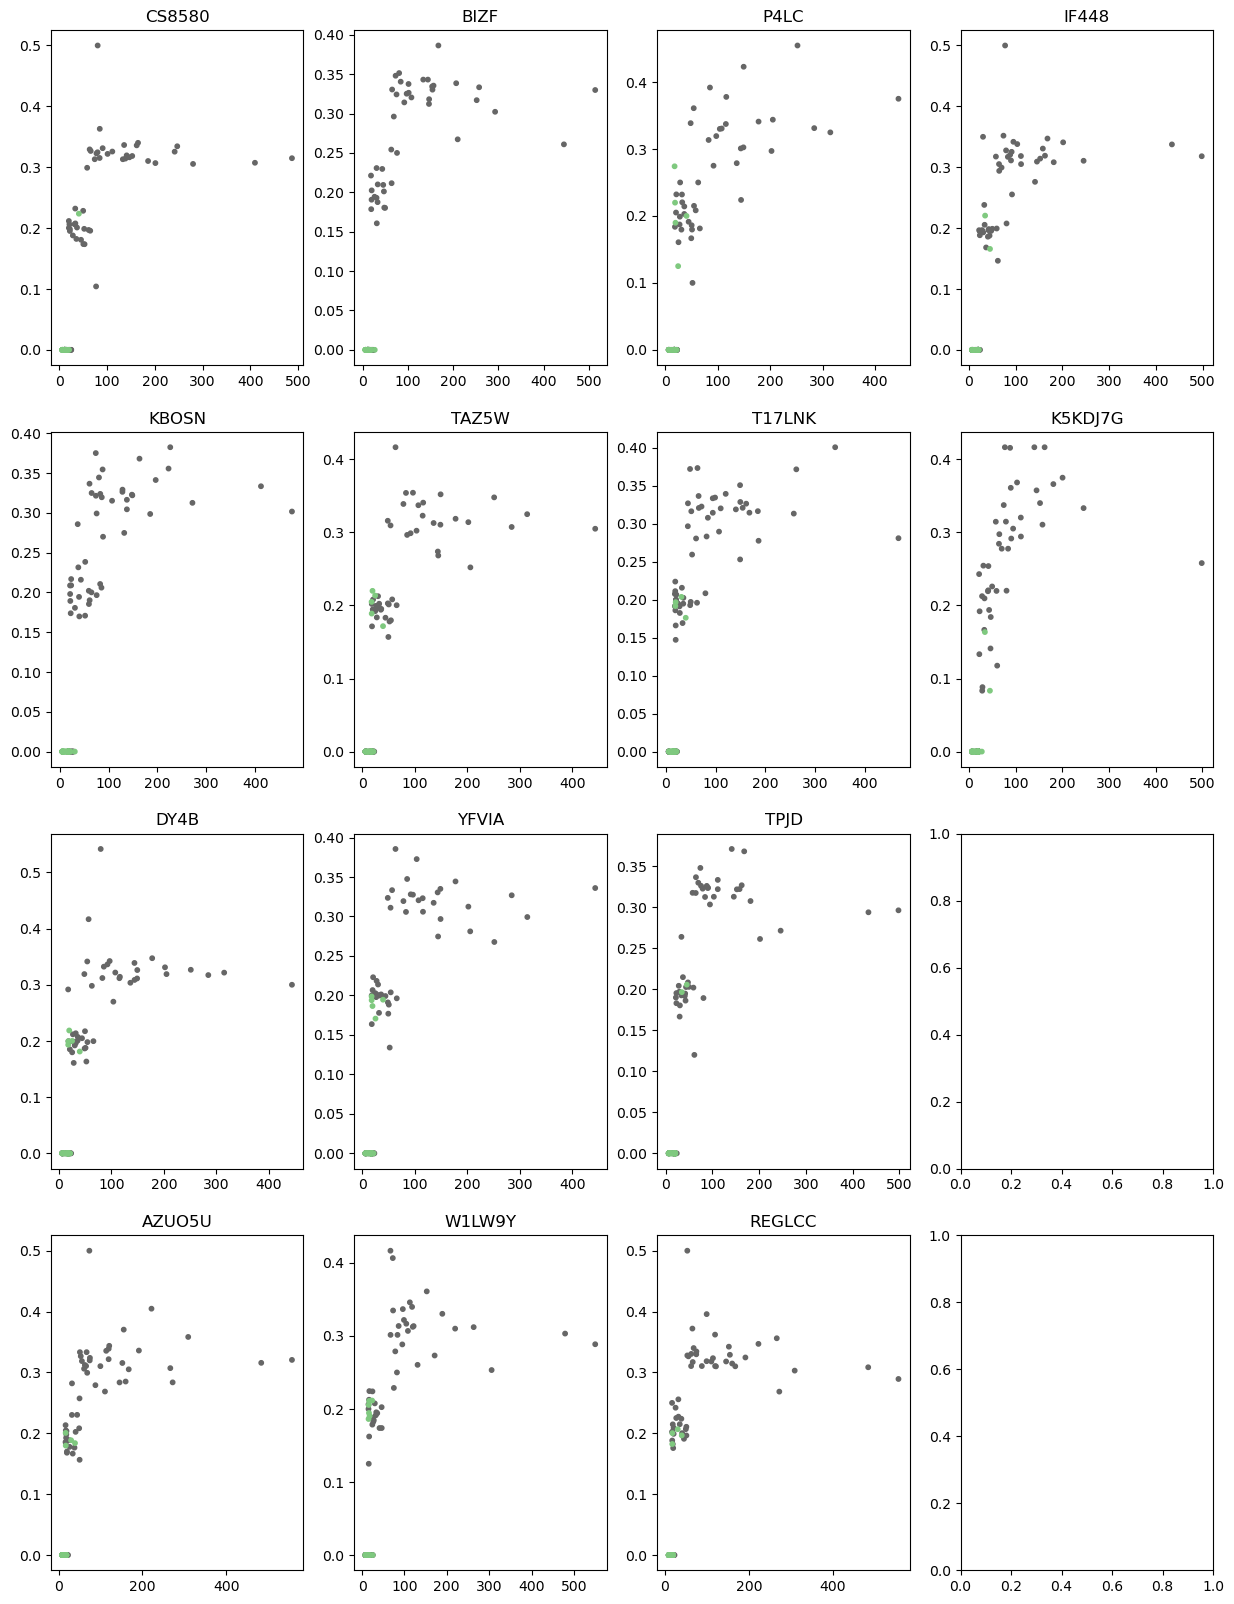

In [32]:
temp=data[data.bin==664344]
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 20))
i=0;j=0
for pcn in temp.pcn.unique():
    if type(pcn)==float: # not considering ones with no pcn
        continue
    temp1=temp[temp.pcn==pcn].groupby(['drug'],as_index=False).rejected.mean()
    temp2=temp[temp.pcn==pcn].groupby(['drug'],as_index=False).patient_pay.quantile(0.75)
    tt=pd.merge(temp1,temp2,on=['drug'])
    tt['branded']=tt.drug.apply(lambda x:x.startswith('branded')==True)
    axes[i,j].scatter(tt.patient_pay,tt.rejected,c=tt['branded'],s=10,cmap='Accent')
    axes[i,j].set_title(pcn)
    i+=1
    if i==4:
        j+=1
        i=0


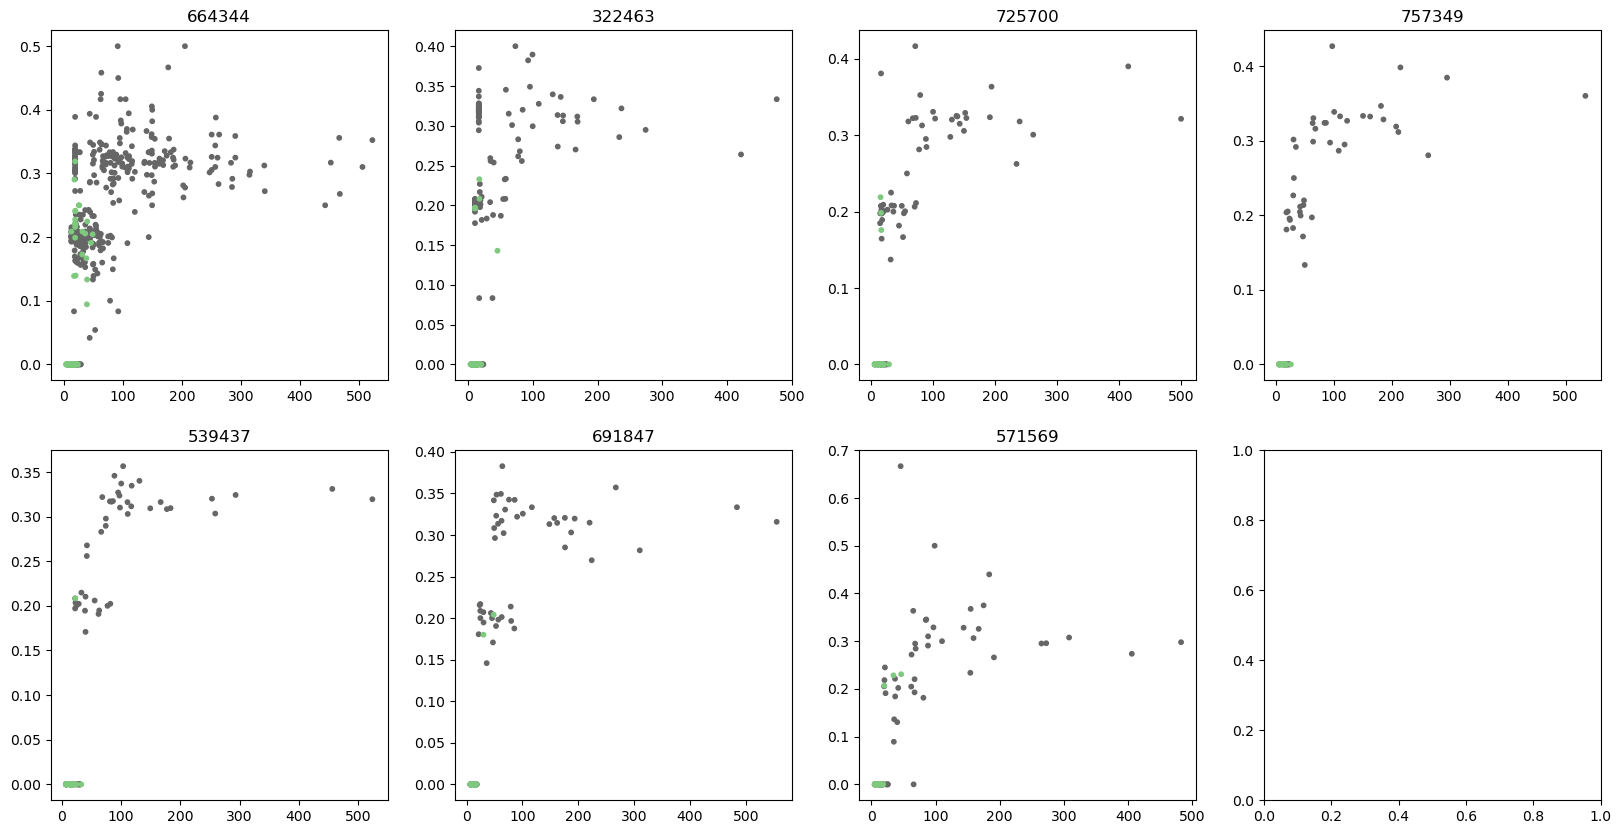

In [7]:
# insurance comapnies without pcn; we use group to visualize

temp=data[(data.pcn.isna()==True)]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
i=0;j=0

for bin in temp.bin.unique():
    temp1=temp[temp.bin==bin].groupby(['drug','group'],as_index=False).rejected.mean()
    temp2=temp[temp.bin==bin].groupby(['drug','group'],as_index=False).patient_pay.quantile(0.75)
    tt=pd.merge(temp1,temp2,on=['drug','group'])
    tt['branded']=tt.drug.apply(lambda x:x.startswith('branded')==True)

    axes[i,j].scatter(tt.patient_pay,tt.rejected,c=tt['branded'],s=10,cmap='Accent')
    axes[i,j].set_title(bin)
    i+=1
    if i==2:
        j+=1
        i=0

[571569]


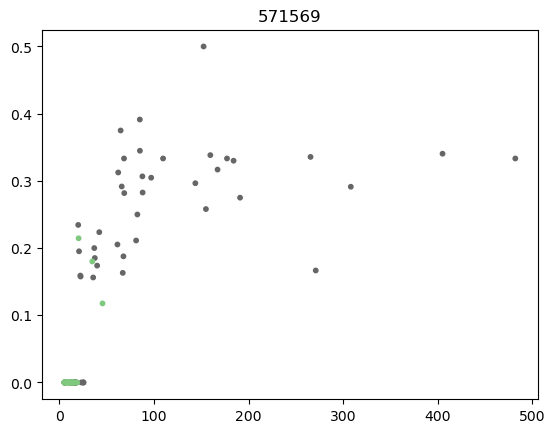

In [33]:
# only one insurance company without pcn or group

temp=data[(data.group.isna()==True) & (data.pcn.isna()==True)]
fig, axes = plt.subplots(nrows=1, ncols=1)
i=0;j=0
print(temp.bin.unique())
for bin in temp.bin.unique():
    temp1=temp[temp.bin==bin].groupby(['drug'],as_index=False).rejected.mean()
    temp2=temp[temp.bin==bin].groupby(['drug'],as_index=False).patient_pay.quantile(0.75)
    tt=pd.merge(temp1,temp2,on=['drug'])
    tt['branded']=tt.drug.apply(lambda x:x.startswith('branded')==True)
    axes.scatter(tt.patient_pay,tt.rejected,c=tt['branded'],s=10,cmap='Accent')
    axes.set_title(bin)